A = NEUTRAL

B = NEGATIVE

C = VERY NEGATIVE

D = POSITIVE

E = VERY POSITIVE

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib .pyplot as plt
import re
import warnings

warnings.filterwarnings("ignore")

In [2]:
#omporting dataset 
df = pd.read_csv('5sentiments.csv')
df.head()


,CLASS,SENTENCES,SNO
0,A,میں نے ایٹم بم بنایا ھے,1
1,B,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,2
2,A,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,3
3,B,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے هو...,4
4,A,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",5


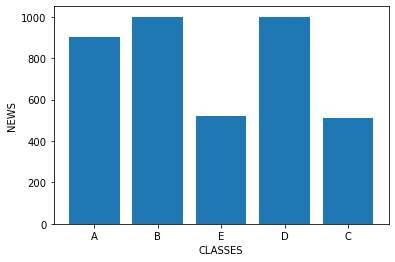

In [3]:
##### BAR PLOT
from matplotlib import pyplot as plt
import pandas as pd

plt.bar(df.CLASS,df.SNO)
plt.ylabel("NEWS")
plt.xlabel("CLASSES")
plt.show()

In [4]:
# checking anything is null
df.isnull().sum()

CLASS        0
SENTENCES    0
SNO          0
dtype: int64

In [5]:
# putthing space in the null value
df['SENTENCES'] = df['SENTENCES'].fillna(' ')
df

,CLASS,SENTENCES,SNO
0,A,میں نے ایٹم بم بنایا ھے,1
1,B,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,2
2,A,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,3
3,B,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے هو...,4
4,A,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",5
...,...,...,...
995,B,پونے : ایک سالہ بچی سے عصمت دری کے بعد کیا قتل...,996
996,B,اغوا کے بعد تین سال کی معصوم کی آبروریزی ، قب...,997
997,D,ہندوستانی کرکٹ ٹیم کے ایک اہم ستون ہیں مہندرسن...,998
998,D,جنوبی افریقی کرکٹرنے اچانک کردیا ریٹائرمنٹ کا ...,999


In [6]:
# checking anything is null
df.isnull().sum()

CLASS        0
SENTENCES    0
SNO          0
dtype: int64

In [7]:
# # Associate Category names with numerical index and save it in new column category_id
category_id=df['category_id'] = df['CLASS'].factorize()[0]

# category_id = review_df.CLASS.factorize()
# category_id
# View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]
sentiment_label = df.CLASS.factorize()
a = np.array(sentiment_label)

# print()
# # np.array(sentiment_label)
print(type(a))

<class 'numpy.ndarray'>


In [8]:
category_id_df = df[['CLASS', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,CLASS,category_id
0,A,0
1,B,1
5,E,2
6,D,3
12,C,4


In [9]:
df.sample(5, random_state=0)

,CLASS,SENTENCES,SNO,category_id
993,D,پرنیتی چوپڑا نے بلیک بکنی پہن کر پانی میں لگائ...,994,3
859,D,شاباش اچھی تربیت ہے اس طرح کی زبان اپنے گھر بھ...,860,3
298,B,: مولانا ڈیزل سے ڈیزل خان تک کا شرمناک سفرڈیزل...,299,1
553,B,ہم پیپلز پارٹی سے اپنے حکومتی تعلقات کو ختم کر...,554,1
672,D,لاہور: وزیر اعلی نوٹس لے کر داد رسی کریں ۔ مظا...,673,3


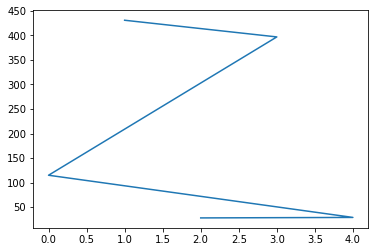

In [10]:
plt.plot(df['category_id'].value_counts())

In [11]:
df['category_id'].value_counts()

1    431
3    397
0    115
4     29
2     28
Name: category_id, dtype: int64

In [12]:
x =df['SENTENCES']
y = df['category_id']

In [13]:
preprocessing = []
for i in range(len(x)):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '',x[i], flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    preprocessing.append(text)
#     print(preprocessing[0:10])
    
# Now, before proceeding ahead in python sentiment analysis project let’s tokenize all the words in the text with the help of Tokenizer. In tokenization, we break down all the words/sentences of a text into small parts called tokens.

from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(preprocessing)
print(tokenizer)
# The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
vocab_size = len(tokenizer.word_index) + 1    

# Now, replace the words with their assigned numbers using the text_to_sequence() method.

encoded_docs = tokenizer.texts_to_sequences(preprocessing)
print(encoded_docs)

[[2, 9, 1075, 1076, 268, 22], [72, 4, 35, 8, 43, 25, 94, 103, 13, 79, 239], [197, 95, 525, 1077, 124, 124, 104, 526, 14, 527, 1904], [1905, 368, 8, 1906, 320, 528, 65, 1078, 1079, 188, 1907, 1908, 188, 8, 1078, 1909, 188, 321, 529, 218, 10], [1910, 15, 112, 1911, 15, 112, 1912, 15, 47, 8, 1913, 15, 1914], [1915, 1916, 96, 1917, 146, 161, 1080, 1918, 1919, 431, 96, 1920, 269, 1921, 161], [28, 1081, 1922, 1923, 22, 1924, 17, 51, 1082, 1925, 112, 169, 432, 22, 1926, 28, 1927, 188, 1082, 1928, 22, 240], [1083, 433, 1, 1084, 1, 55, 1085, 1086, 1087, 1929], [94, 103, 3, 369, 1088, 1930, 1089, 6, 1090], [1931, 58, 434, 189, 270, 4, 73, 530, 118, 17, 125, 30, 271, 47, 9, 1091, 531, 435, 1092, 531, 9, 170, 734, 21, 434, 9, 1932, 73, 532, 170, 7, 1933, 59], [1093, 735, 19, 16, 1934, 1935, 19, 16, 1936, 1094, 1937, 736, 124, 1095, 2, 12, 737, 23, 52], [45, 241, 1, 436, 134, 533, 1938, 738, 37, 739, 1939, 53, 5, 10, 370, 1940], [1941, 1942, 1943, 1944, 1945, 11, 272, 1946, 198, 15, 171, 18, 26, 14

In [14]:
# Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence)


[[   0    0    0 ... 1076  268   22]
 [   0    0    0 ...   13   79  239]
 [   0    0    0 ...   14  527 1904]
 ...
 [   0    0    0 ...   14 1902 1474]
 [   0    0    0 ...  386    6  173]
 [   0    0    0 ...   20   11   21]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
# vocab_size = 13234
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           178176    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 194,827
Trainable params: 194,827
Non-trainable params: 0
__________________________________________________

In [16]:
# Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

history = model.fit(padded_sequence,a[0],validation_split=0.2, epochs=10, batch_size=32)
# The python sentiment analysis model obtained 96% accuracy on the training set and 94.33% accuracy on the test set

Epoch 1/10
25/25 [==============================] - 5s 108ms/step - loss: -0.3819 - accuracy: 0.4225 - val_loss: -4.6482 - val_accuracy: 0.4600
Epoch 2/10
25/25 [==============================] - 2s 86ms/step - loss: -4.5272 - accuracy: 0.4238 - val_loss: -8.6316 - val_accuracy: 0.4600
Epoch 3/10
25/25 [==============================] - 4s 147ms/step - loss: -6.5855 - accuracy: 0.4238 - val_loss: -11.1657 - val_accuracy: 0.4600
Epoch 4/10
25/25 [==============================] - 2s 83ms/step - loss: -8.1098 - accuracy: 0.4238 - val_loss: -12.9739 - val_accuracy: 0.4600
Epoch 5/10
25/25 [==============================] - 4s 150ms/step - loss: -9.2862 - accuracy: 0.4238 - val_loss: -14.5506 - val_accuracy: 0.4600
Epoch 6/10
25/25 [==============================] - 2s 83ms/step - loss: -10.4212 - accuracy: 0.4238 - val_loss: -16.0933 - val_accuracy: 0.4600
Epoch 7/10
25/25 [==============================] - 4s 145ms/step - loss: -11.3181 - accuracy: 0.4238 - val_loss: -17.5919 - val_accur

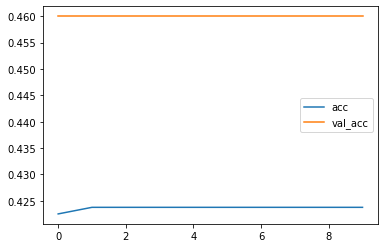

<Figure size 432x288 with 0 Axes>

In [17]:
# Let’s plot these metrics using the matplotlib.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

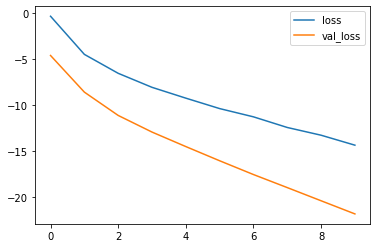

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

# Let’s execute sentiment analysis model

In [19]:
# Define a function that takes a text as input and outputs its prediction label.

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے "
predict_sentiment(test_sentence1)

# test_sentence2 = "This is the worst flight experience of my life!"
# predict_sentiment(test_sentence2)

1/1 [==============================] - 1s 568ms/step
Predicted label:  B
